<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.158568,78.459767,92.054590,4015.537420,4263.210344,478.576574,3784.633771
1,0.0,1.0,99.781382,67.039835,68.180778,-2546.213703,-2301.211709,-292.919898,-2008.291810
2,0.0,2.0,77.625907,32.425156,52.656939,176.394743,349.102745,-68.499322,417.602068
3,0.0,3.0,97.142909,62.771373,99.887887,374.524759,644.326929,400.985486,243.341443
4,0.0,4.0,87.793125,23.799412,58.696489,167.185409,347.474435,-1.871793,349.346229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.461905,68.606921,65.898577,-2198.950913,-1985.983509,348.184461,-2334.167970
119996,999.0,116.0,74.832705,62.138978,78.440270,-607.856429,-382.444475,668.799937,-1051.244413
119997,999.0,117.0,92.008215,88.754348,21.719249,4868.785217,5081.267029,-334.034452,5415.301481
119998,999.0,118.0,46.098617,50.343236,77.118276,-857.548492,-673.988363,334.488211,-1008.476574


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    67.158568  78.459767  ...  478.576574  3784.633771
      1.0    99.781382  67.039835  ... -292.919898 -2008.291810
      2.0    77.625907  32.425156  ...  -68.499322   417.602068
      3.0    97.142909  62.771373  ...  400.985486   243.341443
      4.0    87.793125  23.799412  ...   -1.871793   349.346229
...                ...        ...  ...         ...          ...
999.0 115.0  68.461905  68.606921  ...  348.184461 -2334.167970
      116.0  74.832705  62.138978  ...  668.799937 -1051.244413
      117.0  92.008215  88.754348  ... -334.034452  5415.301481
      118.0  46.098617  50.343236  ...  334.488211 -1008.476574
      119.0  45.045532  32.136823  ...  -29.156336   216.019987

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    67.158568  78.459767  ...  478.576574  3784.633771
      1.0    99.781382  67.039835  ... -292.919898 -2008.291810
      2.0    77.625907  32.425156  ...  -68.499322   417.602068
      3.0    97.142909  62.771373  ...  400.985486   243.341443
      4.0    87.793125  23.799412  ...   -1.871793   349.346229
...                ...        ...  ...         ...          ...
999.0 115.0  68.461905  68.606921  ...  348.184461 -2334.167970
      116.0  74.832705  62.138978  ...  668.799937 -1051.244413
      117.0  92.008215  88.754348  ... -334.034452  5415.301481
      118.0  46.098617  50.343236  ...  334.488211 -1008.476574
      119.0  45.045532  32.136823  ...  -29.156336   216.019987

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.158568,78.459767,92.054590,4015.537420,4263.210344,478.576574,3784.633771
1,0.0,1.0,99.781382,67.039835,68.180778,-2546.213703,-2301.211709,-292.919898,-2008.291810
2,0.0,2.0,77.625907,32.425156,52.656939,176.394743,349.102745,-68.499322,417.602068
3,0.0,3.0,97.142909,62.771373,99.887887,374.524759,644.326929,400.985486,243.341443
4,0.0,4.0,87.793125,23.799412,58.696489,167.185409,347.474435,-1.871793,349.346229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.461905,68.606921,65.898577,-2198.950913,-1985.983509,348.184461,-2334.167970
119996,999.0,116.0,74.832705,62.138978,78.440270,-607.856429,-382.444475,668.799937,-1051.244413
119997,999.0,117.0,92.008215,88.754348,21.719249,4868.785217,5081.267029,-334.034452,5415.301481
119998,999.0,118.0,46.098617,50.343236,77.118276,-857.548492,-673.988363,334.488211,-1008.476574


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    67.158568  78.459767  ...  478.576574  3784.633771
      1.0    99.781382  67.039835  ... -292.919898 -2008.291810
      2.0    77.625907  32.425156  ...  -68.499322   417.602068
      3.0    97.142909  62.771373  ...  400.985486   243.341443
      4.0    87.793125  23.799412  ...   -1.871793   349.346229
...                ...        ...  ...         ...          ...
999.0 115.0  68.461905  68.606921  ...  348.184461 -2334.167970
      116.0  74.832705  62.138978  ...  668.799937 -1051.244413
      117.0  92.008215  88.754348  ... -334.034452  5415.301481
      118.0  46.098617  50.343236  ...  334.488211 -1008.476574
      119.0  45.045532  32.136823  ...  -29.156336   216.019987

[120000 rows x 7 columns]

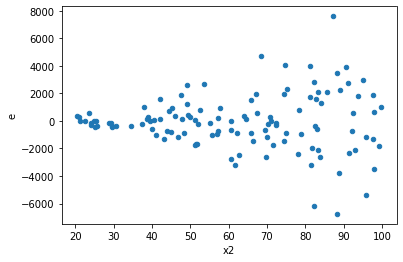

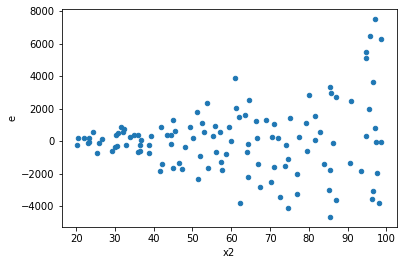

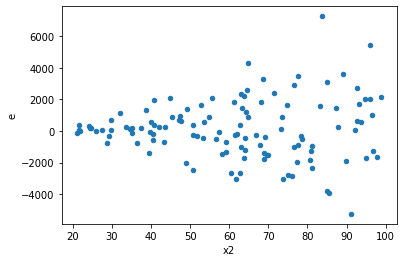

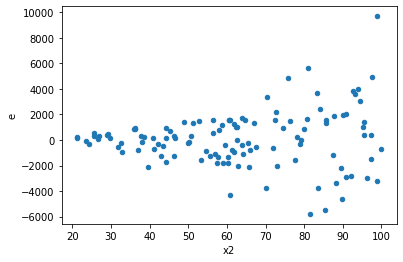

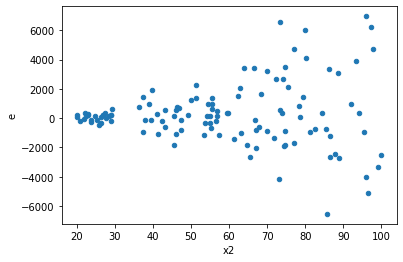

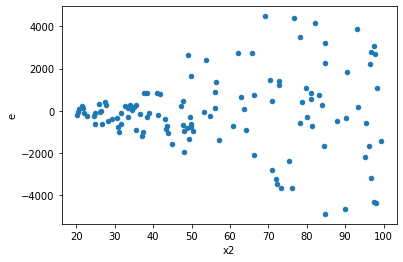

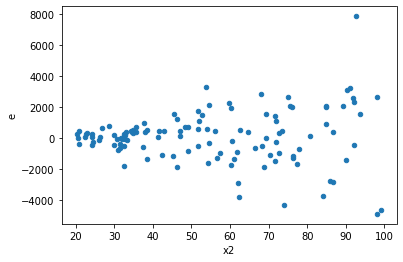

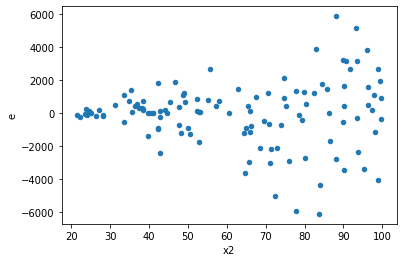

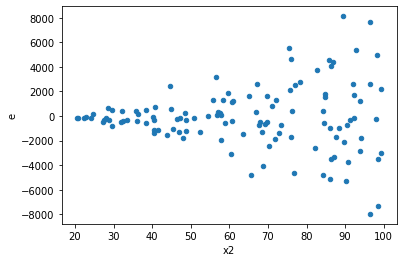

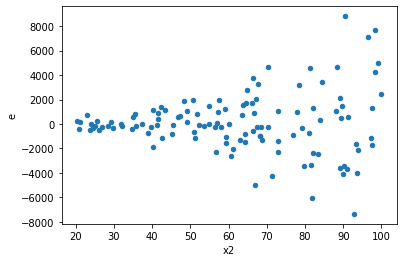

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,57.0,57.0,42862234.11360059,309688807.46922934,751969.0195368525,5433136.973144375,7.225213847893248,4.076738946423575e-12,0.9999999999979616,2.0383694732117874e-12,Reject005=0 : Heteroscedasticity
5.0,58.0,56.0,224538774.46381778,262656112.66881722,3871358.1804106515,4690287.726228879,1.2115354631772564,0.4724017402423528,0.7637991298788236,0.2362008701211764,Reject005=1 : Homoscedasticity
6.0,57.0,57.0,64489604.589602254,371537799.28120893,1131396.571747408,6518207.00493349,5.761204486298129,4.888507376676898e-10,0.9999999997555746,2.444253688338449e-10,Reject005=0 : Heteroscedasticity
9.0,54.0,60.0,206400186.21931985,351603933.24576074,3822225.670728145,5860065.554096012,1.5331553024130187,0.10773861898987391,0.946130690505063,0.05386930949493696,Reject005=1 : Homoscedasticity
10.0,56.0,58.0,200177553.02182811,252489493.41718578,3574599.1611040733,4353267.127882513,1.2178336455878134,0.45811782999374717,0.7709410850031264,0.22905891499687359,Reject005=1 : Homoscedasticity
11.0,55.0,59.0,183477691.66639245,290813966.70991886,3335958.0302980444,4929050.283218964,1.4775516473684736,0.14206405696785485,0.9289679715160726,0.07103202848392742,Reject005=1 : Homoscedasticity
12.0,51.0,63.0,176453563.12607554,229061250.36886,3459873.786785795,3635892.8629977778,1.0508744211665315,0.8454051934223847,0.5772974032888076,0.42270259671119237,Reject005=1 : Homoscedasticity
16.0,73.0,41.0,162185064.87031987,154275908.7642459,2221713.217401642,3762827.0430303877,1.6936601058849186,0.06879549371971039,0.9656022531401448,0.034397746859855194,Reject005=1 : Homoscedasticity
19.0,56.0,58.0,254538170.7679265,411913255.36825293,4545324.477998688,7101952.678762982,1.562474299280385,0.09415782851263566,0.9529210857436822,0.04707891425631783,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,57.0,57.0,42862234.11360059,309688807.46922934,751969.0195368525,5433136.973144375,7.225213847893248,4.076738946423575e-12,Reject005=0 : Heteroscedasticity
1.0,68.0,46.0,193696625.25019747,127787335.06548613,2848479.783091139,2777985.5449018725,0.9752519787545176,0.912494936530144,Reject005=1 : Homoscedasticity
2.0,56.0,58.0,316490452.66267884,35457481.704731815,5651615.226119265,611335.8914608933,0.1081701189839622,2.2016146527676093e-14,Reject005=0 : Heteroscedasticity
3.0,52.0,62.0,357711948.5088775,212290177.14401433,6879075.932863029,3424035.1152260373,0.49774637591490795,0.01067049667028552,Reject005=0 : Heteroscedasticity
4.0,61.0,53.0,341778388.62695324,296692251.51105624,5602924.403720545,5597967.00964257,0.999115213106448,0.9923829895725502,Reject005=1 : Homoscedasticity
5.0,58.0,56.0,224538774.46381778,262656112.66881722,3871358.1804106515,4690287.726228879,1.2115354631772564,0.4724017402423528,Reject005=1 : Homoscedasticity
6.0,57.0,57.0,64489604.589602254,371537799.28120893,1131396.571747408,6518207.00493349,5.761204486298129,4.888507376676898e-10,Reject005=0 : Heteroscedasticity
7.0,61.0,53.0,304397290.3452254,156824745.8791186,4990119.513856154,2958957.4694173317,0.5929632469124521,0.04924246244123988,Reject005=0 : Heteroscedasticity
8.0,62.0,52.0,326568119.3639549,169188536.88374484,5267227.731676692,3253625.7093027853,0.617711227812638,0.06946652985108048,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    623
Reject005=1 : Homoscedasticity      377
Name: Result_test, dtype: int64